In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Carrega o dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = maligno, 1 = benigno (já vem rotulado como o enunciado pede)

# Normaliza os dados (ajuda no treinamento do Perceptron)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Algoritmo do Perceptron
def treinar_perceptron(X_train, y_train, learning_rate=0.01, epochs=100):
    X_train = np.insert(X_train, 0, 1, axis=1)  # Bias
    w = np.zeros(X_train.shape[1])
    for _ in range(epochs):
        for xi, target in zip(X_train, y_train):
            y_pred = 1 if np.dot(w, xi) >= 0 else 0
            w += learning_rate * (target - y_pred) * xi
    return w

def testar_perceptron(X_test, w):
    X_test = np.insert(X_test, 0, 1, axis=1)
    y_pred = np.dot(X_test, w)
    return (y_pred >= 0).astype(int)

In [5]:
# Validação cruzada com 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Treinamento
    w = treinar_perceptron(X_train, y_train)

    # Teste
    y_pred = testar_perceptron(X_test, w)

    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold}: Acurácia = {acc:.4f}")

Fold 1: Acurácia = 0.9649
Fold 2: Acurácia = 0.9649
Fold 3: Acurácia = 0.9825
Fold 4: Acurácia = 0.9474
Fold 5: Acurácia = 0.9474
Fold 6: Acurácia = 0.9298
Fold 7: Acurácia = 0.9825
Fold 8: Acurácia = 0.9649
Fold 9: Acurácia = 0.9649
Fold 10: Acurácia = 0.9821



Acurácia média: 0.9631
Desvio padrão: 0.0165


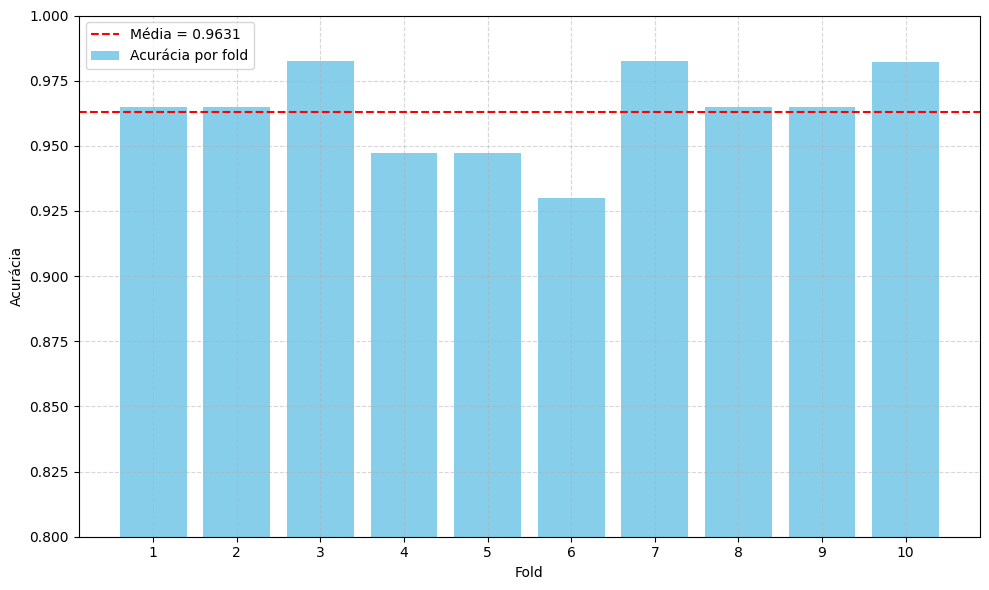

In [6]:
# Resultados finais
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
print(f"\nAcurácia média: {mean_acc:.4f}")
print(f"Desvio padrão: {std_acc:.4f}")

# Plota gráfico de barras com as acurácias
folds = np.arange(1, 11)

plt.figure(figsize=(10, 6))
plt.bar(folds, accuracies, color='skyblue', label='Acurácia por fold')
plt.axhline(mean_acc, color='red', linestyle='--', label=f'Média = {mean_acc:.4f}')
plt.xticks(folds)
plt.ylim(0.8, 1.0)
plt.xlabel('Fold')
plt.ylabel('Acurácia')
#plt.title('Desempenho do Perceptron por Fold (Validação Cruzada)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()